# Discrete Tomography: Reconstruct Image from Horizontal and Vertical projection

### imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output

### functions

In [2]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
#     ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

### read image

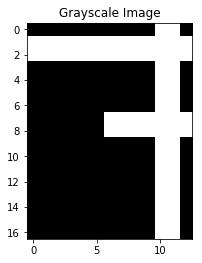

In [3]:
# image_path = '../images/question.png'
image_path = '../images/f4inverse.png'

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 254
gray[gray<threshold] = 0
gray[gray>=threshold] = 1
bw = 1-gray
plotimage(bw, 'Grayscale Image', (3,3))

In [4]:
bw

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=uint8)

### Create Horizontal and Vertical Projections

In [5]:
vert_original = np.sum(bw, axis=1)
print("vertical projection:\n", np.atleast_2d(vert_original).T)

hor_original = np.sum(bw, axis=0)
print("horizontal projection:\n",hor_original)

vertical projection:
 [[ 2]
 [13]
 [13]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 7]
 [ 7]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]]
horizontal projection:
 [ 2  2  2  2  2  2  4  4  4  4 17 17  4]


### Reconstruct image

In [6]:
def available(i,j):
    return vert[i] and hor[j] #if there is a place (non-zero) in both vert and hor for this cell, return true

In [7]:
def validate():
    return not hor.any() and not vert.any() #returns true if both hor and vert have all zeros, false otherwise

In [8]:
def debug(k):
    if not enable_debug:
        return
    
    clear_output(wait=True)
    plotimage(res, 'debug', (2,2))
    print("hor:", hor)
    print("vert:", vert)

In [9]:
def backtrack(k):
    if k >= size:
        return validate()
    
    i = k//cols
    j = k%cols
    
    if available(i,j): ##There is a place in this row and column
        #try to place a 1 here
        res[i,j]=1
        vert[i]-=1
        hor[j]-=1
        
        ###### DEBUGGING RESULTS #######
        debug(k)
        ################################

        if backtrack(k+1):
            return True #placing a one worked, return True
        
        #placing a one didn't work, revert changes
        res[i,j]=0
        vert[i]+=1
        hor[j]+=1
        
    #whether the place isn't available, or placing one didn't work, try to skip this cell (keep the zero) and check the next one
    return backtrack(k+1)

### Call Backtrack algorithm with no Heuristics <font color="red">(Will take a long time for most of the photos)</font>

In [10]:
# %%time
# vert = vert_original.copy()
# hor = hor_original.copy()

# rows, cols = bw.shape[0], bw.shape[1]

# res = np.zeros((rows,cols))
# size = rows*cols

# enable_debug = False

# b=backtrack(0)
# if b:
#     plotimage(res, 'Result', (3,3))
# else:
#     print("Not found!")

### Use Sorting Heuristic

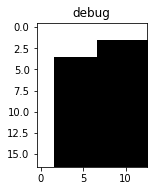

hor: [0 0 0 0 0 0 0 0 0 0 0 0 0]
vert: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


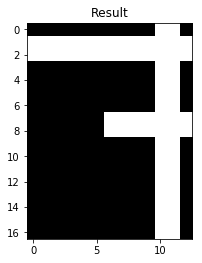

Wall time: 8.11 s


In [11]:
%%time
vert = vert_original.copy()
hor = hor_original.copy()
vert_arg = vert.argsort()[::-1] # store original order before sorting
hor_arg = hor.argsort()[::-1]   # store original order before sorting

vert[::-1].sort()
hor[::-1].sort()

rows, cols = bw.shape[0], bw.shape[1]

res = np.zeros((rows,cols))
size = rows*cols

enable_debug = True

b=backtrack(0)
if b:
    #reverse sort:
    res2 = res.copy()
    k=0
    for i in vert_arg:
        res2[i]=res[k]
        k+=1
    
    res3 = res2.copy()
    k=0
    for j in hor_arg:
        res3[:,j]=res2[:,k]
        k+=1
    
    plotimage(res3, 'Result', (3,3))
else:
    print("Not found!")